In [2]:
#Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
#Reading dataset
dta = pd.read_csv(r'D:\Work docs\Python datasets\Mall Customer Clustering\Mall_Customers.csv')
dta.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
#Summarizing data in all columns
dta.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [14]:
#Checking for null value in each variable
dta.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

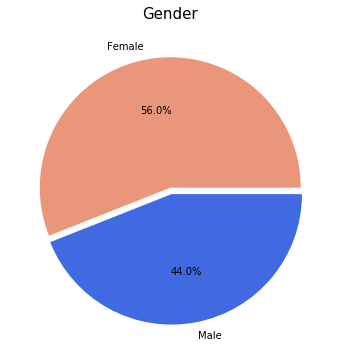

In [57]:
piedata = dta['Gender'].value_counts() #Data for pie chart
fig, ax = plt.subplots(figsize=(6,6))
ax.pie(piedata, labels=['Female','Male'], colors = ['darksalmon','royalblue'], explode = [0,0.05], autopct = '%.1f%%')
plt.title('Gender', size=15)
plt.show()

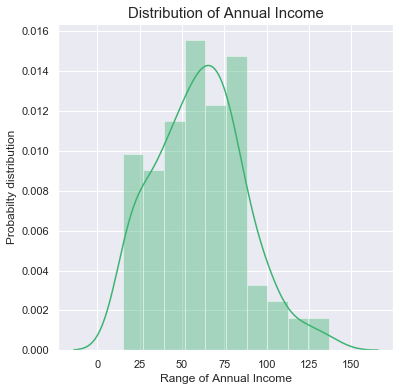

In [74]:
fig, ax1 = plt.subplots(figsize=(6,6))
sb.set(style = 'darkgrid')
sb.distplot(dta['Annual Income (k$)'], color = 'mediumseagreen')
plt.title('Distribution of Annual Income', fontsize=15)
plt.xlabel('Range of Annual Income')
plt.ylabel('Probabilty distribution')
plt.show()

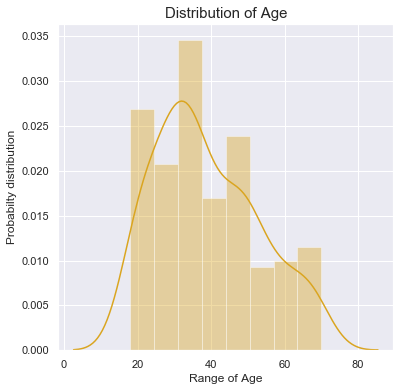

In [76]:
fig, ax2 = plt.subplots(figsize=(6,6))
sb.set(style = 'darkgrid')
sb.distplot(dta['Age'], color = 'goldenrod')
plt.title('Distribution of Age', fontsize=15)
plt.xlabel('Range of Age')
plt.ylabel('Probabilty distribution')
plt.show()

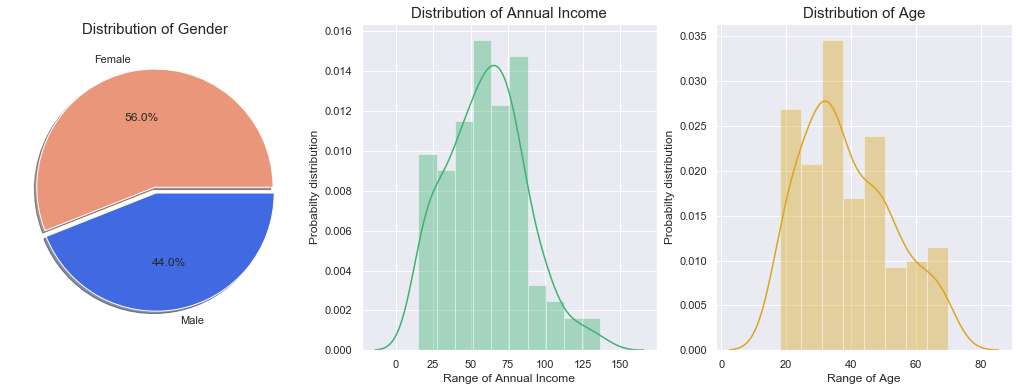

In [88]:
fig, ax2 = plt.subplots(figsize=(18,6))

plt.subplot(1,3,1)
piedata = dta['Gender'].value_counts() #Data for pie chart
plt.pie(piedata, labels=['Female','Male'], colors = ['darksalmon','royalblue'], shadow = True, explode = [0,0.05], autopct = '%.1f%%')
plt.title('Distribution of Gender', size=15)

plt.subplot(1,3,2)
sb.set(style = 'darkgrid')
sb.distplot(dta['Annual Income (k$)'], color = 'mediumseagreen')
plt.title('Distribution of Annual Income', fontsize=15)
plt.xlabel('Range of Annual Income')
plt.ylabel('Probabilty distribution')

plt.subplot(1,3,3)
sb.set(style = 'darkgrid')
sb.distplot(dta['Age'], color = 'goldenrod')
plt.title('Distribution of Age', fontsize=15)
plt.xlabel('Range of Age')
plt.ylabel('Probabilty distribution')

plt.show()

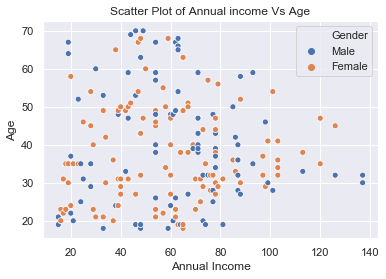

In [113]:
sb.scatterplot(dta['Annual Income (k$)'],dta['Age'], hue=dta['Gender'])
plt.title('Scatter Plot of Annual income Vs Age')
plt.xlabel('Annual Income')
plt.show()

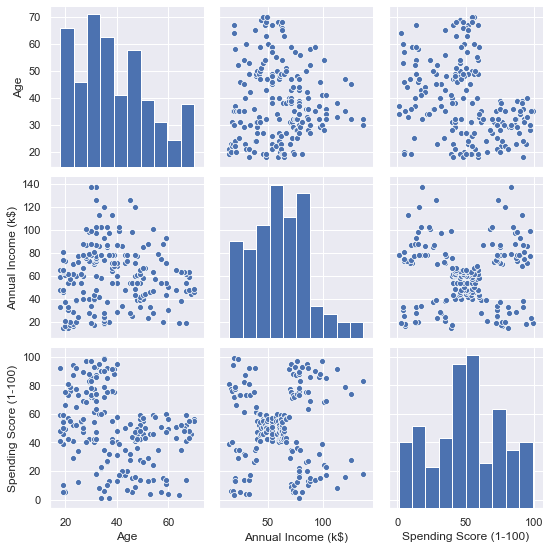

In [123]:
sb.pairplot(dta.drop(['CustomerID','Gender'], axis=1))
plt.show()

In [4]:
#Clustering people by just age factor
from sklearn.cluster import KMeans
x = pd.DataFrame(dta['Age'])

km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
dta['Age Groups'] = km.fit_predict(x)

dta['Age Groups'] = dta['Age Groups'].replace({0:'Young adult',1:'Adult',2:'Senior'})
dta.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Groups
0,1,Male,19,15,39,Young adult
1,2,Male,21,15,81,Young adult
2,3,Female,20,16,6,Young adult
3,4,Female,23,16,77,Young adult
4,5,Female,31,17,40,Young adult


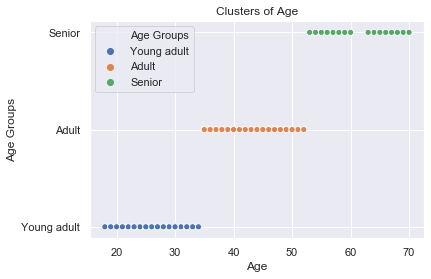

In [184]:
sb.scatterplot(dta['Age'],dta['Age Groups'], hue=dta['Age Groups'])
plt.title('Clusters of Age')
plt.show()

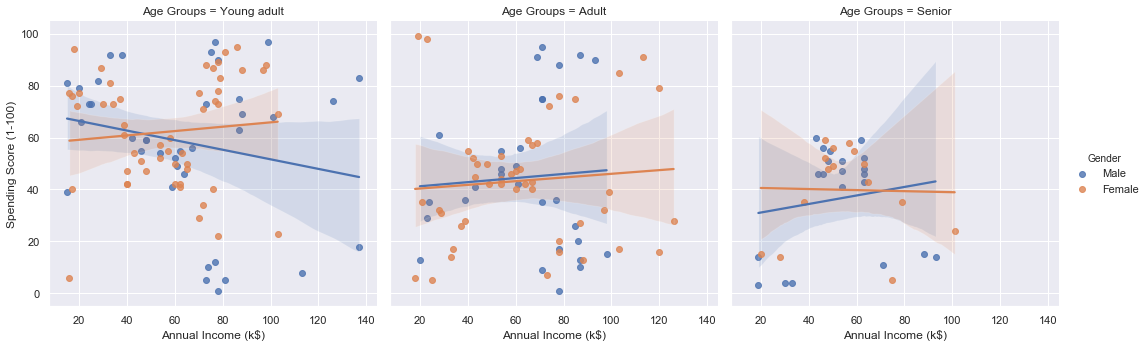

In [188]:
sb.lmplot(x='Annual Income (k$)', y = 'Spending Score (1-100)', data=dta, hue = 'Gender', col = 'Age Groups')
plt.show()

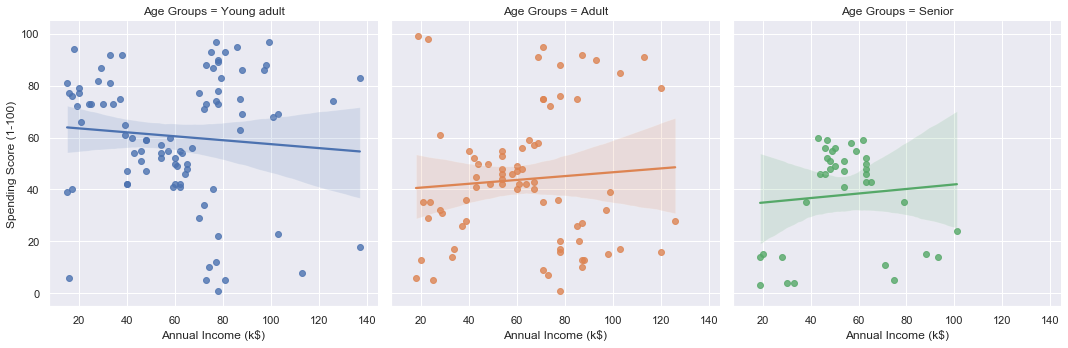

In [191]:
sb.lmplot(x='Annual Income (k$)', y = 'Spending Score (1-100)', data=dta, hue = 'Age Groups',  col = 'Age Groups')
plt.show()

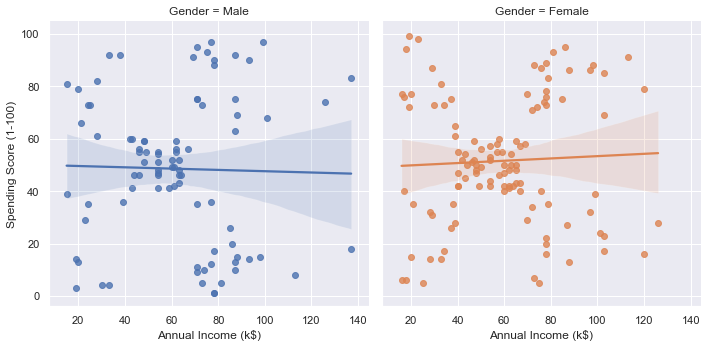

In [193]:
sb.lmplot(x='Annual Income (k$)', y = 'Spending Score (1-100)', data=dta, hue = 'Gender',  col = 'Gender')
plt.show()

In [5]:
dta['Age-Gender']=dta['Age Groups'] + ' - ' + dta['Gender']
dta.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Groups,Age-Gender
0,1,Male,19,15,39,Young adult,Young adult - Male
1,2,Male,21,15,81,Young adult,Young adult - Male
2,3,Female,20,16,6,Young adult,Young adult - Female
3,4,Female,23,16,77,Young adult,Young adult - Female
4,5,Female,31,17,40,Young adult,Young adult - Female


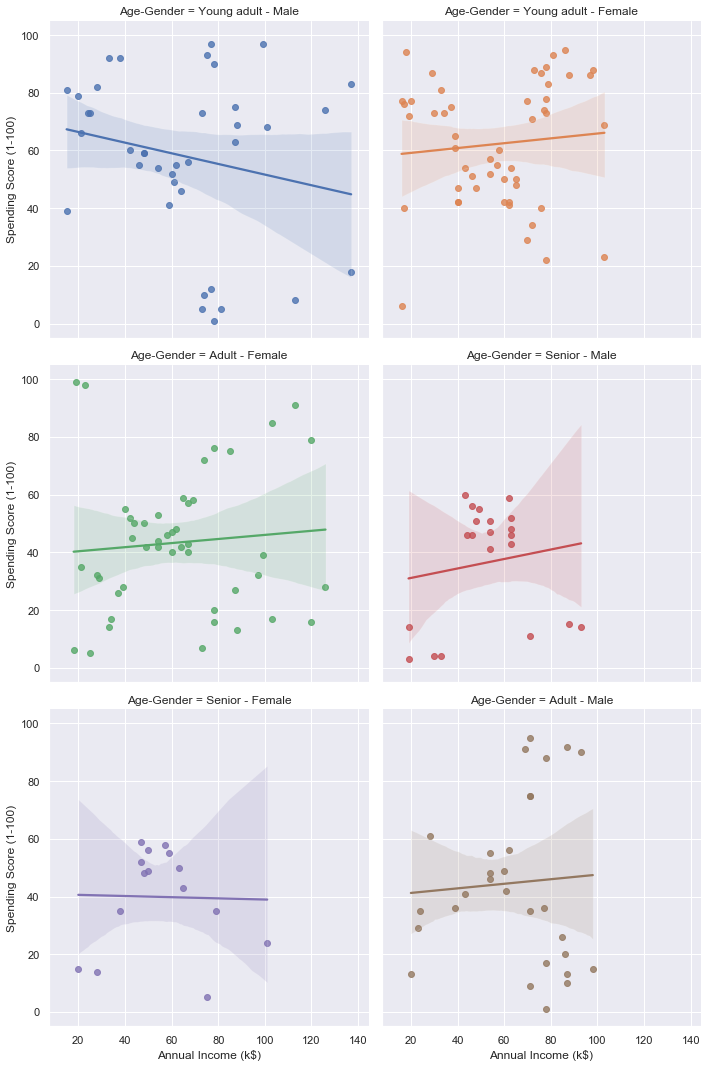

In [202]:
sb.lmplot(x='Annual Income (k$)', y = 'Spending Score (1-100)', data=dta, hue = 'Age-Gender',  col = 'Age-Gender',col_wrap=2)
plt.show()

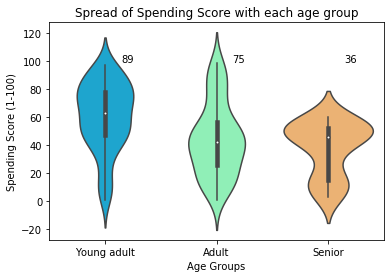

In [44]:
sb.violinplot(dta['Age Groups'],dta['Spending Score (1-100)'], palette = 'rainbow')
age_dict = {0:'Young adult',1:'Adult',2:'Senior'}
for i in range(3):
    plt.text(i+0.2,max(dta['Spending Score (1-100)']),sum(dta['Age Groups']==age_dict[i]),ha='center')
plt.title('Spread of Spending Score with each age group')
plt.show()

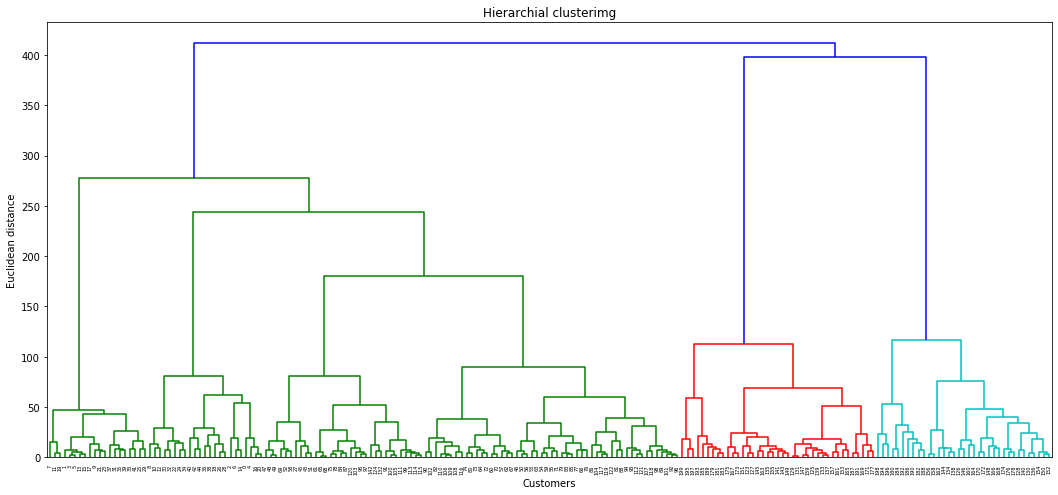

In [51]:
import scipy.cluster.hierarchy as sch

fig, ax = plt.subplots(figsize = (18,8))
dendrogram = sch.dendrogram(sch.linkage(dta.iloc[:,[2,3,4]], method='ward'))
plt.title('Hierarchial clusterimg')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.show()


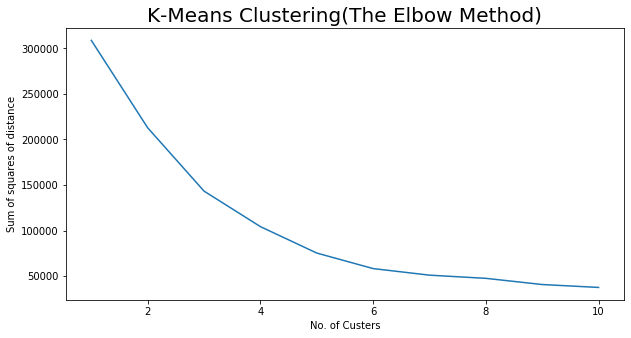

In [65]:
distance_ss = []
for i in range(1,11):
    km = KMeans(n_clusters = i, random_state = 0)
    km.fit(dta.iloc[:,[2,3,4]])
    distance_ss.append(km.inertia_)
    
fig, ax = plt.subplots(figsize = (10,5))

plt.plot(range(1,11), distance_ss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('No. of Custers')
plt.ylabel('Sum of squares of distance')
plt.show()

In [76]:
km = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
km.fit(dta.iloc[:,[2,3,4]])
dta['clusters'] = km.labels_
centroids = km.cluster_centers_

In [80]:
import plotly.express as pex

fig = pex.scatter_3d(dta, x = 'Age', y = 'Spending Score (1-100)', z = 'Annual Income (k$)', color = 'clusters',
                     opacity = 0.8)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
#fig.show()

In [64]:
dta.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Groups,Age-Gender
0,1,Male,19,15,39,Young adult,Young adult - Male
1,2,Male,21,15,81,Young adult,Young adult - Male
2,3,Female,20,16,6,Young adult,Young adult - Female
3,4,Female,23,16,77,Young adult,Young adult - Female
4,5,Female,31,17,40,Young adult,Young adult - Female
